# Automated Hate Speech Detection in Reddit Platform


# Problem Statement

In today's digital era, social media platforms are vital spaces for self-expression. However, this openness often leads to the spread of abuse, offense, and hate speech. Hate speech detection aims to quickly identify and address communication that incites violence or promotes hatred based on sensitive attributes like ethnicity, gender, sexual orientation, religion, and age.

# Solution Description

Our solution involves developing an automated system to detect hate speech in Reddit comments and posts.This process includes data collection, preprocessing, tokenization, encoding, and model evaluation.

## Scope of the Project:

<ul>
<li>Focused on textual data from Reddit comments and posts.</li>
<li>Targeted specific Subreddits and post sections for detailed analysis.</li>
<li>Limited analysis to English language content to ensure focused and effective detection.</li>
<li>Excluded multilingual data to maintain clarity and precision in hate speech detection.</li>
</ul>

## Steps Taken:

<ul>
<li><b>Data Collection:</b> Gathered extensive data from Reddit to create a comprehensive hate speech dataset.</li>
<li><b>Data Preprocessing:</b> Cleaned and preprocessed the data to remove noise and ensure consistency.</li>
<li><b>Tokenization:</b> Applied various tokenization techniques to break down text into manageable pieces.</li>
<li><b>Encoding:</b> Used encoding methods to transform text into numerical data suitable for model training.</li>
<li><b>Machine Learning:</b> Implemented and evaluated several models: Random Forest, Logistic Regression, Naive Bayes Classifier and SVM.</li>
<li><b>Deep Learning:</b> Developed and tested deep learning models including Simple Neural Network (NN), Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM)</li>
</ul>

## Business Impact

The automated detection system will enhance the safety and integrity of Reddit by quickly identifying and mitigating hate speech. It will reduce the reliance on manual moderation, saving time and resources, and improve user experience, leading to higher engagement and retention rates on the platform.

# Dataset Description

## Data Source

The dataset originates from "A Benchmark Dataset for Learning to Intervene in Online Hate Speech".<br>
<b>Link:</b> https://github.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech

## Dataset Overview:

<ul>
<li>Originally comprised approximately 5,000 posts and comments extracted from Reddit.</li>
<li>Each row includes comments associated with specific posts, accompanied by an index indicating the presence of hate speech.</li>
<li>Provides human-written explanations detailing why comments are categorized as hate speech.</li>
</ul>

## Dataset Restructuring:

<ul>
<li>Restructured to transform each post into individual rows for comments.</li>
<li>Dataset size expanded from 5k to 22k entries.</li>
<li>Comments are labeled:<br>
1: Contains hate speech <br>
0: Does not contain hate speech</li>
</ul>




# Data Visualization

## Dataset Size:

Total Size : 22,841

### Dataset Distributions:

<ul>
<li> Non-Hate Speech: 17,545 </li>
<li> Hate Speech: 5,296 </li>
</ul>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import Image

### Class Distribution:


Training Data:
<ul>
<li> Non-Hate Speech (0): 13,553 </li>
<li> Hate Speech (1): 4,230 </li>
</ul>

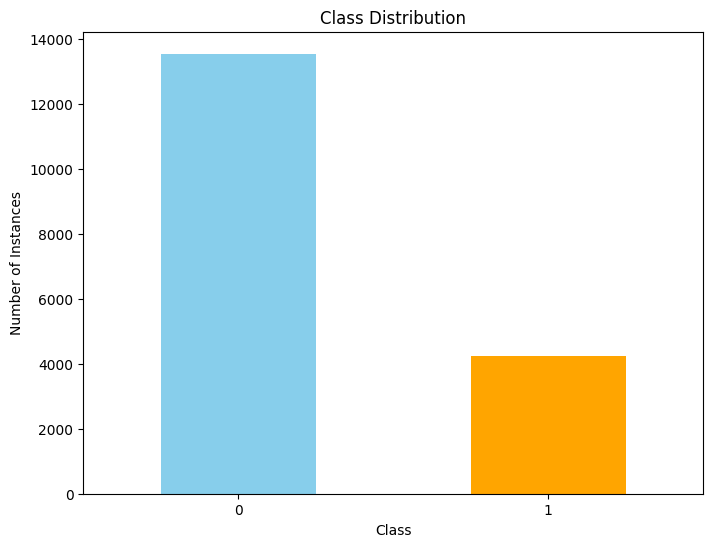

In [ ]:
Image("/content/drive/MyDrive/train_data.png")


Testing Data:
<ul>
<li> Non-Hate Speech (0): 3,389 </li>
<li> Hate Speech (1): 1,057 </li>
</ul>

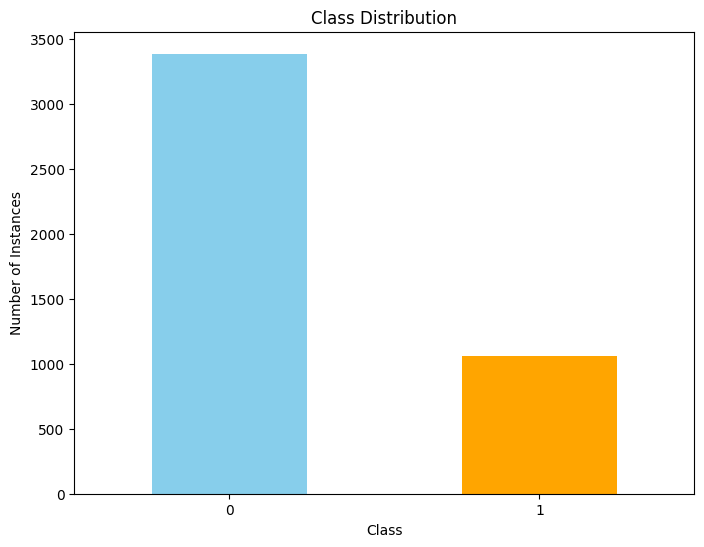

In [ ]:
Image("/content/drive/MyDrive/test_data.png")


## Label-Wise Split

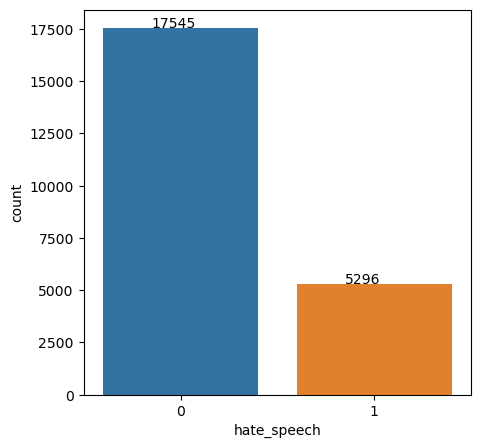

In [ ]:
Image("/content/drive/MyDrive/label_wise_split.png")

# Best Performing Model: LSTM

## Classification Model

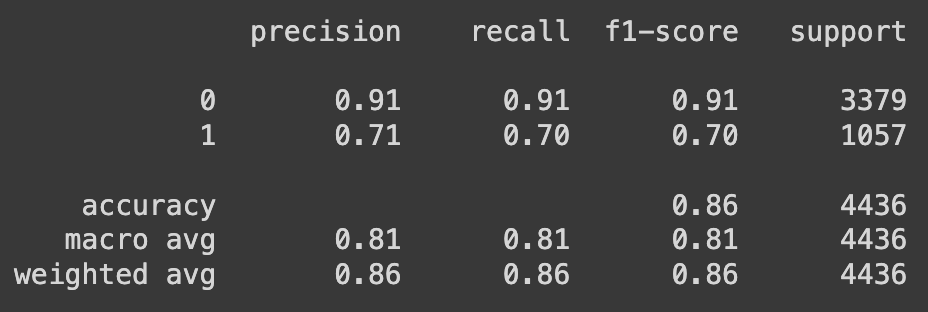

In [ ]:
Image("/content/drive/MyDrive/classification_report.png")

## Confusion Matrix

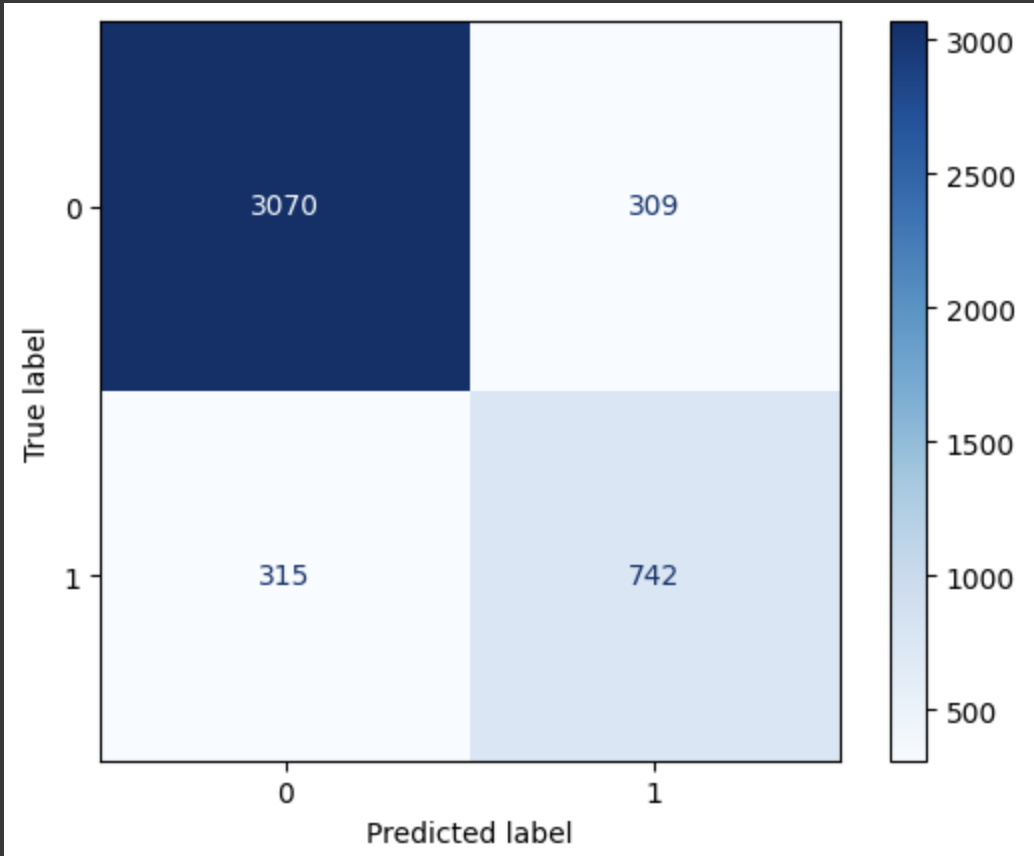

In [ ]:
Image("/content/drive/MyDrive/confusion_matrix.png")

# Sample Model Prediction

In [ ]:
!pip install emoji

In [ ]:
!pip install langdetect

In [ ]:
!pip install fasttext

In [ ]:
!pip install contractions

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import numpy as np
import re
import json
import string
import emoji
from bs4 import BeautifulSoup
from langdetect import detect
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Load chat words and number meanings if needed
with open('/content/drive/MyDrive/chat_words.json', 'r') as f:
    chat_words = json.load(f)

with open('/content/drive/MyDrive/number_meanings.json', 'r') as f:
    number_meanings = json.load(f)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import fasttext

# Load the FastText model
ft_model = fasttext.load_model('/content/drive/MyDrive/cc.en.300.bin')

In [ ]:
from keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/LSTM.h5')

# Check the model summary to ensure it is loaded correctly
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            570368    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 784129 (2.99 MB)
Trainable params: 784129 (2.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def preprocess_text(text):
    text = text.lower()
    try:
        if detect(text) != 'en':
            return ""
    except:
        return ""
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    expanded_words = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_words)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = ' '.join(tokens)
    return clean_text

In [ ]:
def encode_text(texts, ft_model):
    preprocessed_texts = []
    valid_texts = []
    for text in texts:
        clean_text = preprocess_text(text)
        if clean_text == "":
            continue
        words = clean_text.split()
        word_vectors = [ft_model.get_word_vector(word) for word in words]
        if word_vectors:
            text_vector = np.mean(word_vectors, axis=0)
            preprocessed_texts.append(text_vector)
            valid_texts.append(text)
    return np.array(preprocessed_texts), valid_texts

In [ ]:
def predict(texts, ft_model, lstm_model):
    preprocessed_vectors, valid_texts = encode_text(texts, ft_model)
    if preprocessed_vectors.size == 0:
        print("No valid texts to process.")
        return

    preprocessed_vectors = np.expand_dims(preprocessed_vectors, axis=1)
    predictions = lstm_model.predict(preprocessed_vectors)

    for i, text in enumerate(valid_texts):
        print(f"Text: {text}")
        if predictions[i] > 0.5:
            print("Prediction: Hate Speech")
        else:
            print("Prediction: Not Hate Speech")
        print()

In [ ]:
text = [" I hate Disneyland. It's fucking waste of money"]

predict(text, ft_model, model)

1/1 [==============================] - 2s 2s/step
Text:  I hate Disneyland. It's fucking waste of money
Prediction: Not Hate Speech



In [ ]:
text = [" Percy, You are a bitch "]

predict(text, ft_model, model)

1/1 [==============================] - 0s 36ms/step
Text:  Percy, You are a bitch 
Prediction: Hate Speech



In [ ]:
text= ["The food here tastes like shit"]

predict(text, ft_model, model)

1/1 [==============================] - 0s 42ms/step
Text: The food here tastes like shit
Prediction: Not Hate Speech



# User Defined Input

In [ ]:
texts = []
print("Enter texts (type 'done' when finished):")
while True:
    user_input = input()
    if user_input.lower() == 'done':
        break
    texts.append(user_input)

# Call the prediction function
predict(texts, ft_model, model)

Enter texts (type 'done' when finished):
You ever fuck a bitch and she start to cry?
done
1/1 [==============================] - 0s 28ms/step
Text: You ever fuck a bitch and she start to cry?
Prediction: Hate Speech

